# Preprocess Raw Data for Toy Experiment

1. Normalize the data to [0, 100]
2. Name the columns as "x1", "x2", "y"

In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Read the dataset
raw_data = pd.read_csv("./data/toy_classification_raw.csv")

# Change the column names
raw_data.columns = ["x1", "x2", "y"]
print(raw_data)

# Predefine the colors
colors = {0.0: "red", 1.0: "blue"}
random_state = 2023
random_state_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
classifier_max_iter = 500
classifier_activation = 'relu'
classifier_solver = 'adam'
classifier_hidden_layer_sizes = (10, 20, 20, 20, 20)
single_alpha = 0.5
multi_alpha = 0.03

# Fix the random seed
np.random.seed(random_state)

            x1         x2    y
0    23.657801  18.859917  0.0
1    22.573729  17.969223  0.0
2    32.553424  29.463651  0.0
3     6.718035  25.704665  1.0
4    14.401919  16.770856  0.0
..         ...        ...  ...
292  27.697220  18.799309  0.0
293  15.150959  72.000352  1.0
294  22.264378  68.453459  1.0
295  25.677420  90.118212  1.0
296  21.215594  48.265520  1.0

[297 rows x 3 columns]


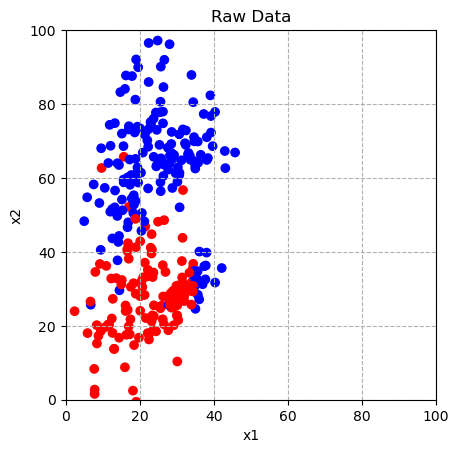

In [3]:
# Visualize the raw data

fig, ax = plt.subplots()
ax.scatter(raw_data["x1"], raw_data["x2"], c=raw_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Raw Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

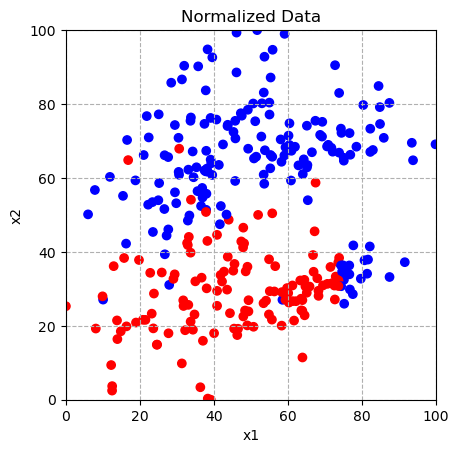

In [4]:
# Normalize the data between 0 and 100
norm_data = raw_data.copy()

norm_data["x1"] = (raw_data["x1"] - raw_data["x1"].min()) / (raw_data["x1"].max() - raw_data["x1"].min()) * 100
norm_data["x2"] = (raw_data["x2"] - raw_data["x2"].min()) / (raw_data["x2"].max() - raw_data["x2"].min()) * 100

# Visualize the normalized data
fig, ax = plt.subplots()
ax.scatter(norm_data["x1"], norm_data["x2"], c=norm_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Normalized Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

# Save the normalized data
norm_data.to_csv("./data/toy_classification_norm.csv", index=False)

## Scikit-learn MLPClassifier

In [5]:
# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(norm_data)):
    tmp = []
    tmp.append(norm_data['x1'][i])
    tmp.append(norm_data['x2'][i])
    X.append(tmp)
    Y.append(norm_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

# Initialize MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                           activation=classifier_activation, solver=classifier_solver,
                           random_state=random_state)

# Fit the model
classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 20, 20, 20, 20), max_iter=500,
              random_state=2023)

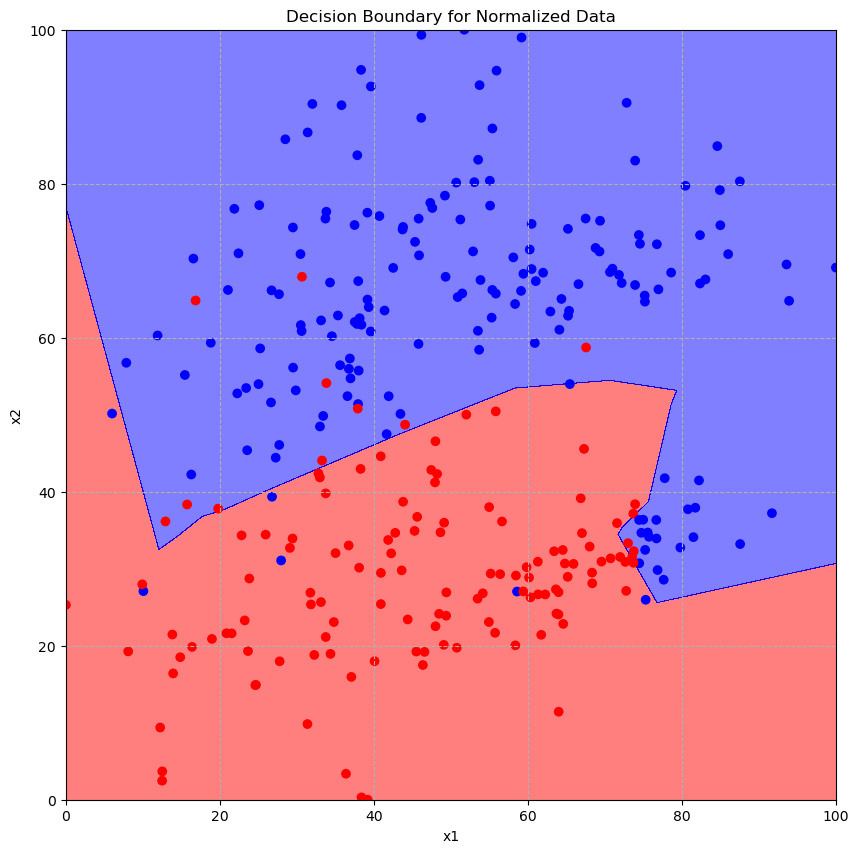

In [6]:
# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T
Z = classifier.predict(z)

# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=single_alpha)
ax.scatter(norm_data["x1"], norm_data["x2"], c=norm_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Decision Boundary for Normalized Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

In [7]:
# Multi-Classifier

classifier_list = []
Z_list = []

for each_random_state in random_state_list:
    classifier_list.append(
        MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                      activation=classifier_activation, solver=classifier_solver,
                      random_state=each_random_state))
    
# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T

for i in range(len(random_state_list)):
    classifier_list[i].fit(x_train, y_train)
    Z_list.append(classifier_list[i].predict(z))

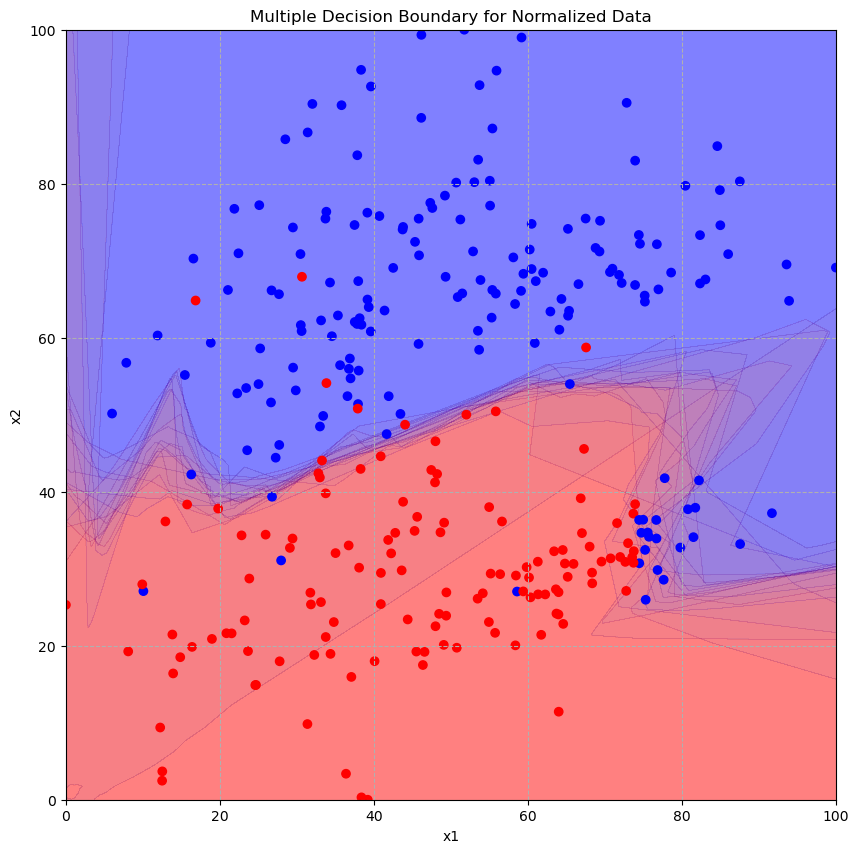

In [8]:
# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(random_state_list)):
    ax.contourf(xx, yy, Z_list[i].reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=multi_alpha)
ax.scatter(norm_data["x1"], norm_data["x2"], c=norm_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Multiple Decision Boundary for Normalized Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

## Process Data

1. Only use x1 < 80 and x2 < 40 for label = 0.0 data
2. Only use x1 > 20 and x2 > 60 for label = 1.0 data

0.0    69
1.0    60
Name: y, dtype: int64


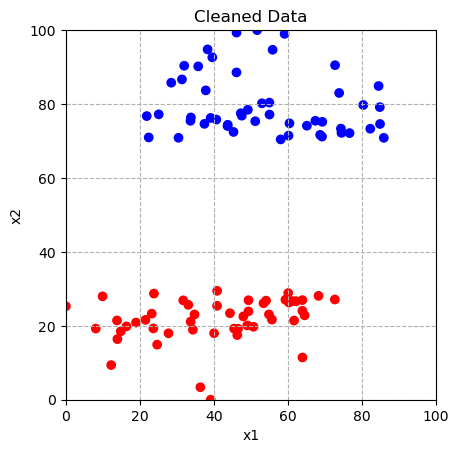

In [9]:
# Process the training data
clean_data = norm_data.copy()

# Only use x1 < 80 and x2 < 40 for class 0
# Only use x1 > 20 and x2 > 60 for class 1
for i in range(len(clean_data)):
    if clean_data["y"][i] == 0.0:
        if clean_data["x2"][i] > 30:
            clean_data.drop([i], inplace=True)
    elif clean_data["y"][i] == 1.0:
        if clean_data["x2"][i] < 70:
            clean_data.drop([i], inplace=True)

# Remain 50 data points for each class
print(clean_data["y"].value_counts())
clean_data = clean_data.groupby("y").head(50)

# Reset the index
clean_data.reset_index(drop=True, inplace=True)

# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(clean_data["x1"], clean_data["x2"], c=clean_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Cleaned Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

clean_data.to_csv("./data/toy_classification_clean.csv", index=False)

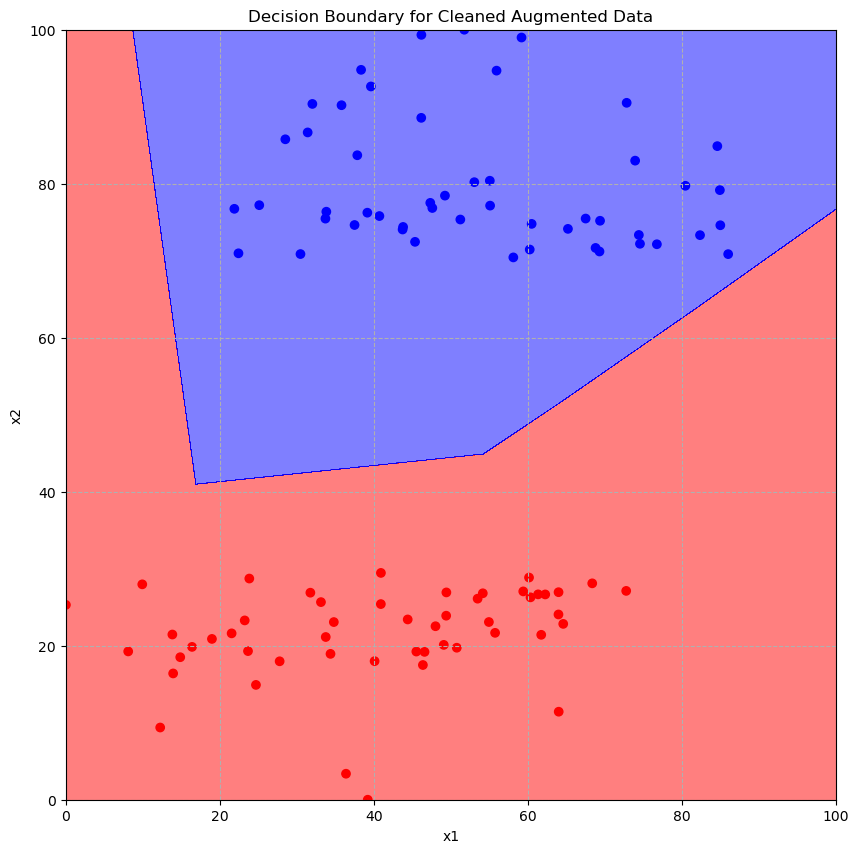

In [10]:
# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(clean_data)):
    tmp = []
    tmp.append(clean_data['x1'][i])
    tmp.append(clean_data['x2'][i])
    X.append(tmp)
    Y.append(clean_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

# Initialize MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                           activation=classifier_activation, solver=classifier_solver,
                           random_state=random_state)

# Fit the model
classifier.fit(x_train, y_train)

# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T
Z = classifier.predict(z)

# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=single_alpha)
ax.scatter(clean_data["x1"], clean_data["x2"], c=clean_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Decision Boundary for Cleaned Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

classifier_list = []
Z_list = []

for each_random_state in random_state_list:
    classifier_list.append(
        MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                      activation=classifier_activation, solver=classifier_solver,
                      random_state=each_random_state))
    
# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T

for i in range(len(random_state_list)):
    classifier_list[i].fit(x_train, y_train)
    Z_list.append(classifier_list[i].predict(z))

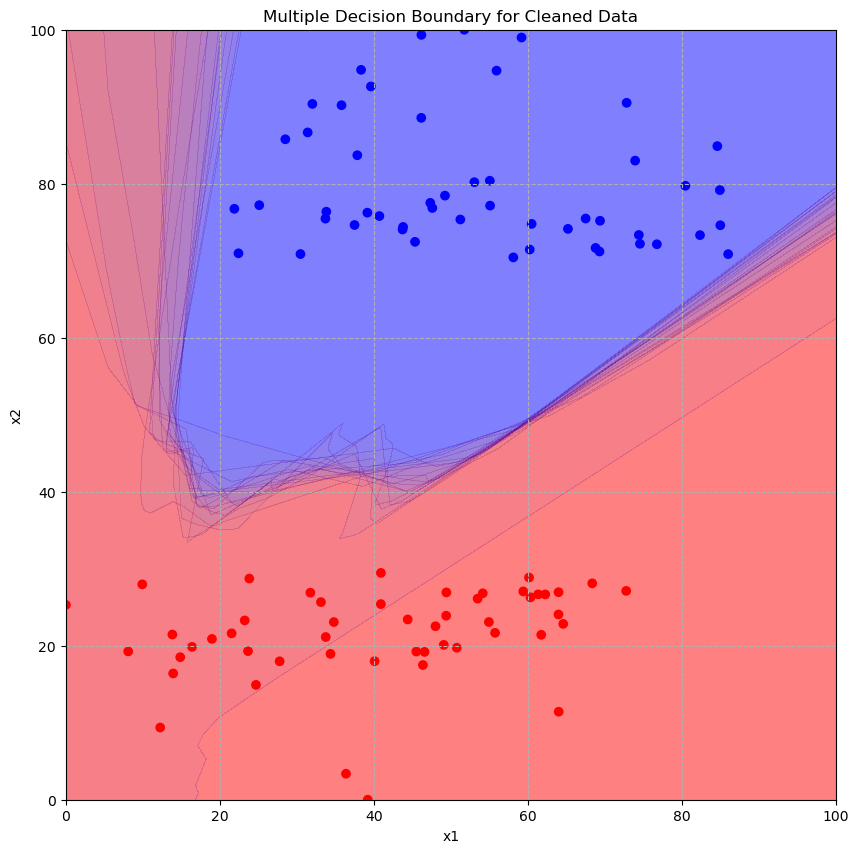

In [11]:
# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(random_state_list)):
    ax.contourf(xx, yy, Z_list[i].reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=multi_alpha)
ax.scatter(clean_data["x1"], clean_data["x2"], c=clean_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Multiple Decision Boundary for Cleaned Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

## Naive Data Augmentation

- Add 10% noise to each data point

0.0    100
1.0    100
Name: y, dtype: int64


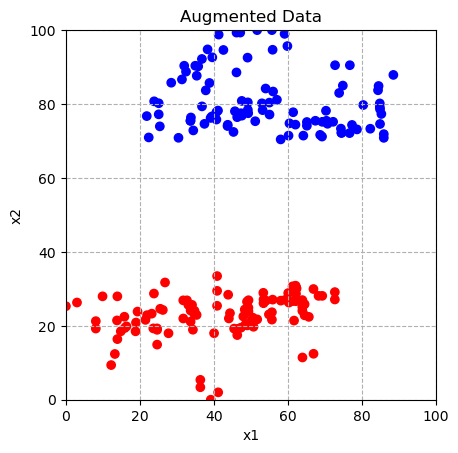

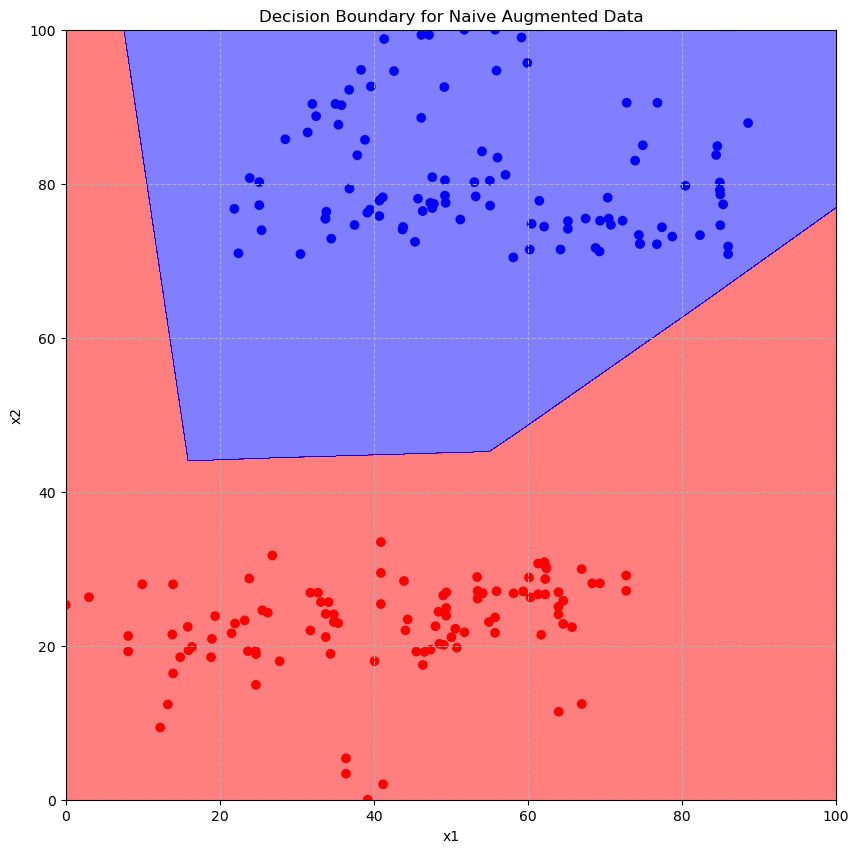

In [12]:
aug1_data = clean_data.copy()

# Augment the data
for i in range(len(aug1_data)):
    aug1_data = pd.concat([aug1_data, 
                           pd.DataFrame({"x1": aug1_data["x1"][i] + np.random.randint(0, 5),
                                         "x2": aug1_data["x2"][i] + np.random.randint(0, 5),
                                         "y": aug1_data["y"][i]}, index=[0])], ignore_index=True)

# Reset the index
aug1_data.reset_index(drop=True, inplace=True)
print(aug1_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(aug1_data["x1"], aug1_data["x2"], c=aug1_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(aug1_data)):
    tmp = []
    tmp.append(aug1_data['x1'][i])
    tmp.append(aug1_data['x2'][i])
    X.append(tmp)
    Y.append(aug1_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

# Initialize MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                           activation=classifier_activation, solver=classifier_solver,
                           random_state=random_state)

# Fit the model
classifier.fit(x_train, y_train)

# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T
Z = classifier.predict(z)

# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=single_alpha)
ax.scatter(aug1_data["x1"], aug1_data["x2"], c=aug1_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Decision Boundary for Naive Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aug1_data.to_csv("./data/toy_classification_naive.csv", index=False)

# Decision Boundary-Aware Augmentation

- Add data sample which is close to the optimal decision boundary

0.0    70
1.0    70
Name: y, dtype: int64


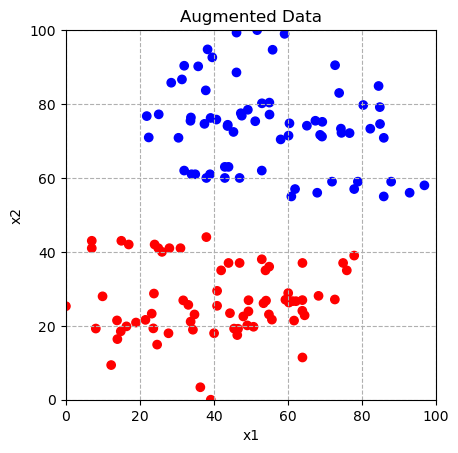

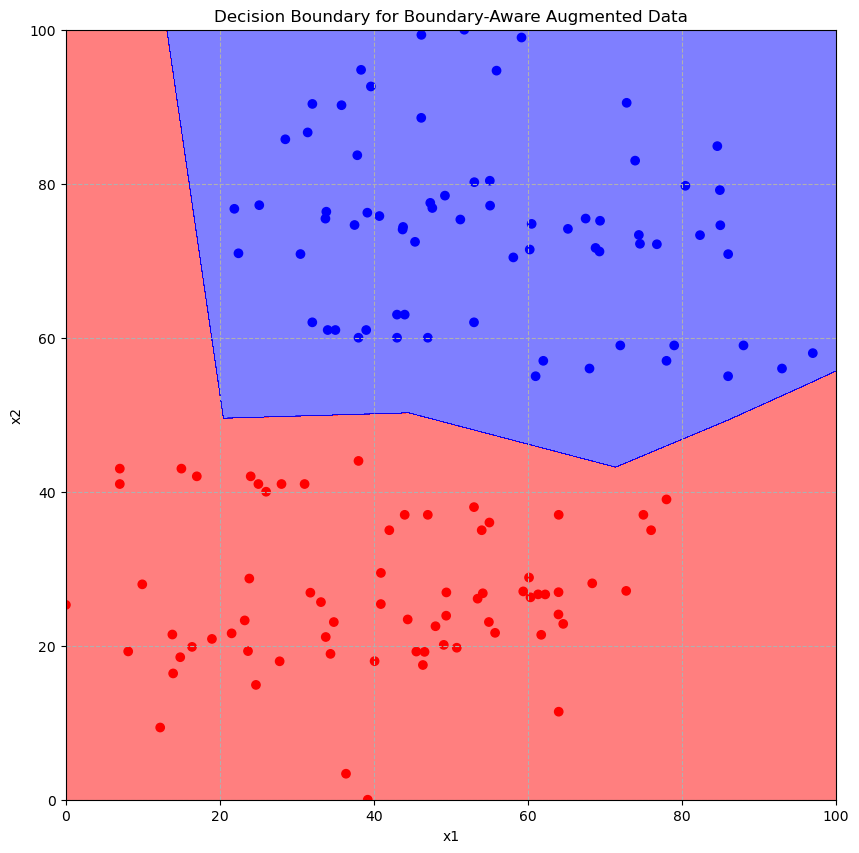

In [13]:
# Add 10 handcrafted data points for each class
aug2_data = clean_data.copy()

# Add 10 data points for each class, which is close to the optimal decision boundary
for i in range(10):
    aug2_data = pd.concat([aug2_data,
                           pd.DataFrame({"x1": np.random.randint(0, 40),
                                         "x2": np.random.randint(40, 45),
                                         "y": 0.0}, index=[0])], ignore_index=True)
    aug2_data = pd.concat([aug2_data,
                           pd.DataFrame({"x1": np.random.randint(40, 80),
                                         "x2": np.random.randint(35, 40),
                                         "y": 0.0}, index=[0])], ignore_index=True)
    
    aug2_data = pd.concat([aug2_data,
                           pd.DataFrame({"x1": np.random.randint(20, 60),
                                         "x2": np.random.randint(60, 65),
                                         "y": 1.0}, index=[0])], ignore_index=True)
    aug2_data = pd.concat([aug2_data,
                           pd.DataFrame({"x1": np.random.randint(60, 100),
                                         "x2": np.random.randint(55, 60),
                                         "y": 1.0}, index=[0])], ignore_index=True)

# Reset the index
aug2_data.reset_index(drop=True, inplace=True)
print(aug2_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(aug2_data["x1"], aug2_data["x2"], c=aug2_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(aug2_data)):
    tmp = []
    tmp.append(aug2_data['x1'][i])
    tmp.append(aug2_data['x2'][i])
    X.append(tmp)
    Y.append(aug2_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

# Initialize MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                           activation=classifier_activation, solver=classifier_solver,
                           random_state=random_state)

# Fit the model
classifier.fit(x_train, y_train)

# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T
Z = classifier.predict(z)

# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=single_alpha)
ax.scatter(aug2_data["x1"], aug2_data["x2"], c=aug2_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Decision Boundary for Boundary-Aware Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aug2_data.to_csv("./data/toy_classification_aware.csv", index=False)

1.0    104
0.0     59
Name: y, dtype: int64


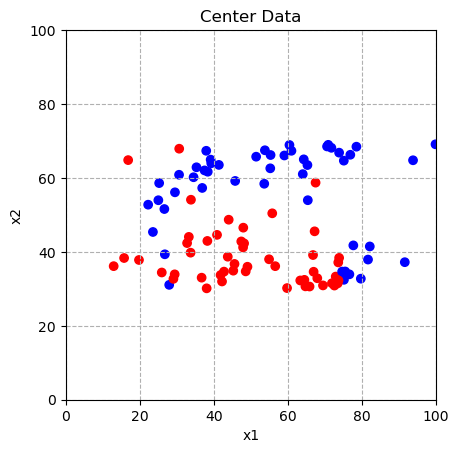

/opt/homebrew/Caskroom/miniforge/base/envs/NLP-torch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


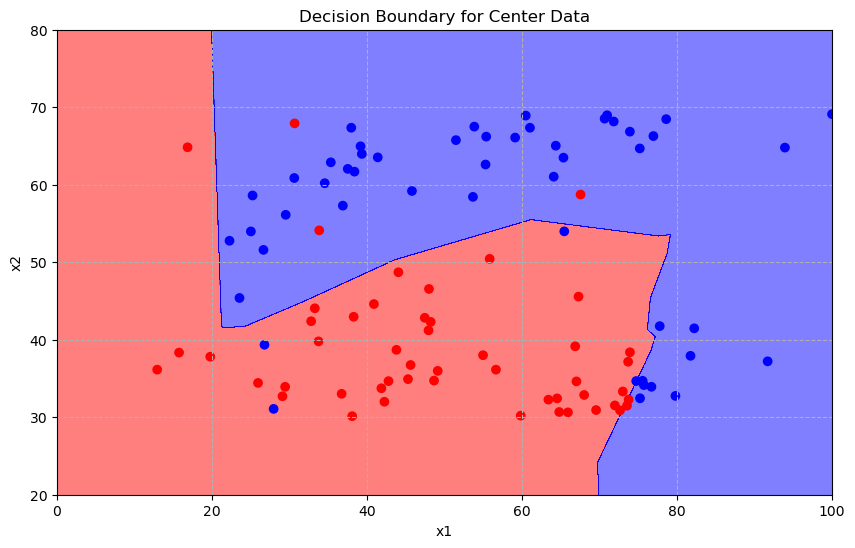

In [14]:
# Process the training data
center_data = norm_data.copy()

for i in range(len(center_data)):
    if center_data["x2"][i] > 70 or center_data["x2"][i] < 30:
        center_data.drop([i], inplace=True)

# Remain 50 data points for each class
print(center_data["y"].value_counts())
center_data = center_data.groupby("y").head(50)

# Reset the index
center_data.reset_index(drop=True, inplace=True)

# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(center_data["x1"], center_data["x2"], c=center_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Center Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()


# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(center_data)):
    tmp = []
    tmp.append(center_data['x1'][i])
    tmp.append(center_data['x2'][i])
    X.append(tmp)
    Y.append(center_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

# Initialize MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                           activation=classifier_activation, solver=classifier_solver,
                           random_state=random_state)

# Fit the model
classifier.fit(x_train, y_train)

# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T
Z = classifier.predict(z)

# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=single_alpha)
ax.scatter(center_data["x1"], center_data["x2"], c=center_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Decision Boundary for Center Data")
ax.set_xlim(0, 100)
ax.set_ylim(20, 80)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

center_data.to_csv("./data/toy_classification_center.csv", index=False)

In [15]:
# Preparing dataset as per the input format of the MLPClassifier.
X = []
Y = []
for i in range(len(center_data)):
    tmp = []
    tmp.append(center_data['x1'][i])
    tmp.append(center_data['x2'][i])
    X.append(tmp)
    Y.append(center_data['y'][i])

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=random_state)

classifier_list = []
Z_list = []

for each_random_state in random_state_list:
    classifier_list.append(
        MLPClassifier(hidden_layer_sizes=classifier_hidden_layer_sizes, max_iter=classifier_max_iter,
                      activation=classifier_activation, solver=classifier_solver,
                      random_state=each_random_state))
    
# Inference for the decision boundary
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(0, 100, h), np.arange(0, 100, h))
z = np.array([xx.ravel(), yy.ravel()]).T

for i in range(len(random_state_list)):
    classifier_list[i].fit(x_train, y_train)
    Z_list.append(classifier_list[i].predict(z))

/opt/homebrew/Caskroom/miniforge/base/envs/NLP-torch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/NLP-torch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/NLP-torch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/NLP-torch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum itera

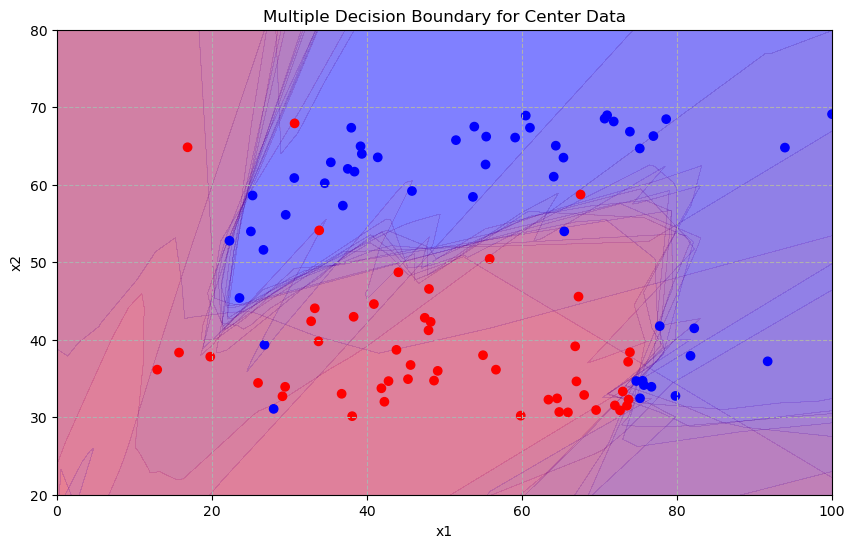

In [ ]:
# Plot the decision boundary
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(random_state_list)):
    ax.contourf(xx, yy, Z_list[i].reshape(xx.shape), cmap=ListedColormap(colors.values()), alpha=multi_alpha)
ax.scatter(center_data["x1"], center_data["x2"], c=center_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Multiple Decision Boundary for Center Data")
ax.set_xlim(0, 100)
ax.set_ylim(20, 80)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()